In [1]:
import pandas as pd
from tabulate import tabulate
df=pd.read_csv("C:/Users/J.TINCKY PRIYA/Downloads/heart.csv")
print(tabulate(df,headers='keys',tablefmt='grid'))
print(df)


+------+-------+-------+------+------------+--------+-------+-----------+-----------+---------+-----------+---------+------+--------+----------+
|      |   age |   sex |   cp |   trestbps |   chol |   fbs |   restecg |   thalach |   exang |   oldpeak |   slope |   ca |   thal |   target |
+======+=======+=======+======+============+========+=======+===========+===========+=========+===========+=========+======+========+==========+
|    0 |    52 |     1 |    0 |        125 |    212 |     0 |         1 |       168 |       0 |       1   |       2 |    2 |      3 |        0 |
+------+-------+-------+------+------------+--------+-------+-----------+-----------+---------+-----------+---------+------+--------+----------+
|    1 |    53 |     1 |    0 |        140 |    203 |     1 |         0 |       155 |       1 |       3.1 |       0 |    0 |      3 |        0 |
+------+-------+-------+------+------------+--------+-------+-----------+-----------+---------+-----------+---------+------+------

In [2]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


In [5]:
from sklearn.tree import DecisionTreeClassifier

# Train decision tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
print("Model trained:", dt_model)
print("Tree depth:", dt_model.get_depth())
print("Number of leaves:", dt_model.get_n_leaves())



Model trained: DecisionTreeClassifier(random_state=42)
Tree depth: 6
Number of leaves: 10


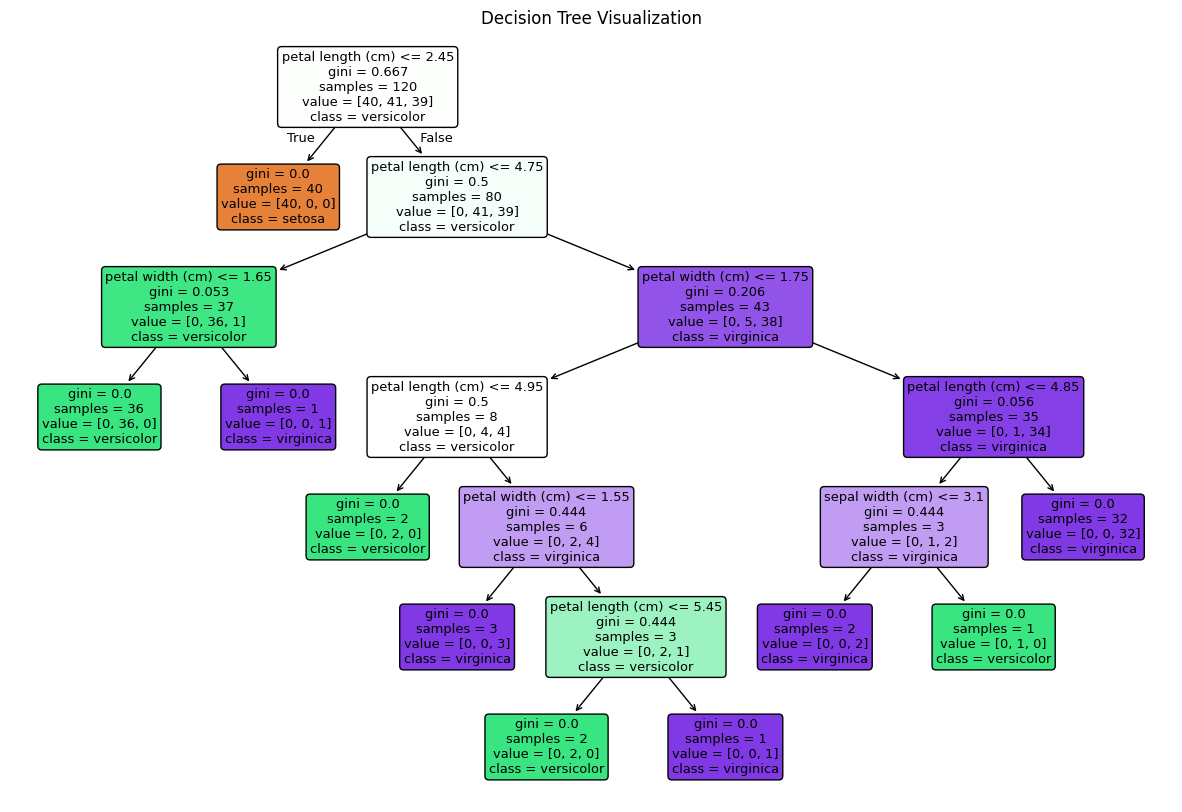

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

# Load Iris dataset
data = load_iris()
X = data.data
y = data.target

# Convert to DataFrame (optional)
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Plot the decision tree inline
plt.figure(figsize=(15, 10))  # Adjust size as needed
plot_tree(dt_model, 
          feature_names=data.feature_names, 
          class_names=data.target_names, 
          filled=True, 
          rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


In [9]:
# Limit depth to avoid overfitting
dt_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_pruned.fit(X_train, y_train)

print("Train Accuracy:", dt_pruned.score(X_train, y_train))
print("Test Accuracy:", dt_pruned.score(X_test, y_test))


Train Accuracy: 0.9583333333333334
Test Accuracy: 1.0


In [10]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("Random Forest Test Accuracy:", rf_model.score(X_test, y_test))


Random Forest Test Accuracy: 1.0


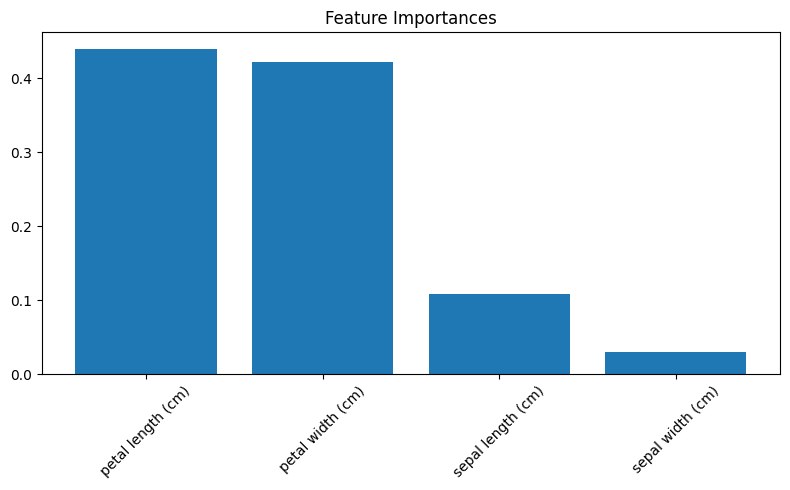

In [11]:
import matplotlib.pyplot as plt
import numpy as np

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(8,5))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [data.feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()


In [12]:
from sklearn.model_selection import cross_val_score

cv_scores_dt = cross_val_score(dt_model, X, y, cv=5)
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5)

print("Decision Tree CV Accuracy:", cv_scores_dt.mean())
print("Random Forest CV Accuracy:", cv_scores_rf.mean())


Decision Tree CV Accuracy: 0.9533333333333334
Random Forest CV Accuracy: 0.9666666666666668
